## Beat/District


district	시카고 경찰서의 행정구역 단위 (22개 내외) <br>
beat	    각 District를 더 작게 나눈 세부 순찰구역 (300개 이상)

In [1]:
%%capture
!pip install koreanize-matplotlib
import koreanize_matplotlib

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
chicago = pd.read_csv('/content/drive/MyDrive/final_csv/최종데이터/최종데이터/chicago_crime_final.csv')

In [ ]:
chicago.columns

In [4]:
chicago.groupby('District')['Arrest'].mean().sort_values(ascending=False)

,Arrest
District,
21.0,0.500000
11.0,0.410126
31.0,0.384956
15.0,0.381821
10.0,0.308332
7.0,0.274212
9.0,0.269419
1.0,0.264768
25.0,0.263543


<ipython-input-12-49780d94a2c0>:10: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) NanumGothic.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


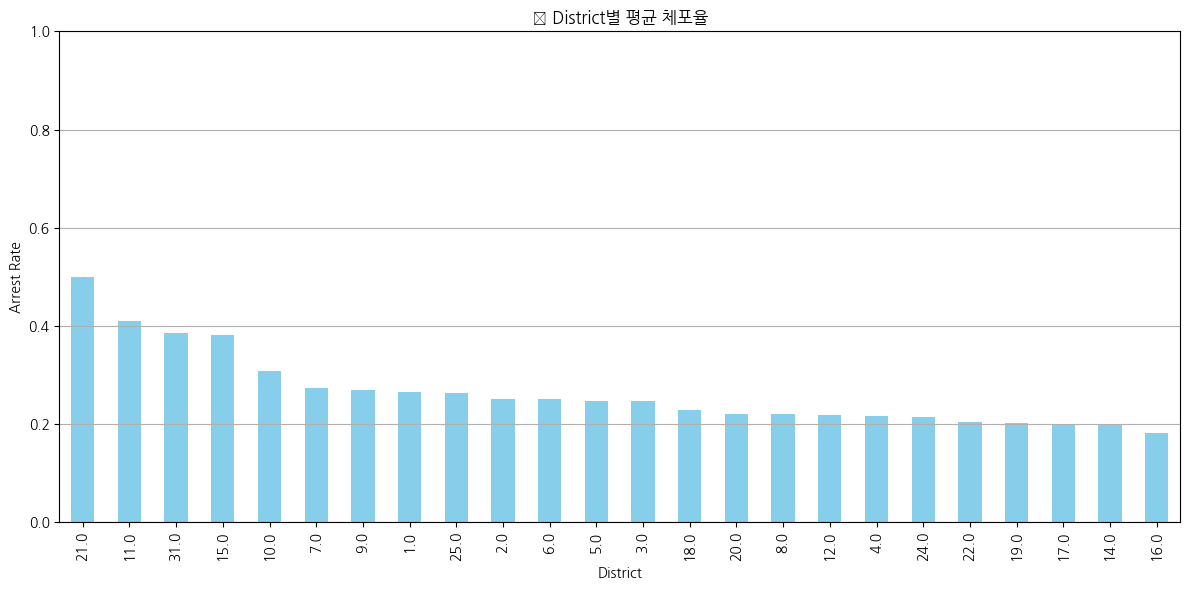

In [12]:
district_arrest = chicago.groupby('District')['Arrest'].mean().sort_values(ascending=False)

import matplotlib.pyplot as plt
district_arrest.plot(kind='bar', figsize=(12,6), color='skyblue')
plt.title('District별 평균 체포율')
plt.xlabel('District')
plt.ylabel('Arrest Rate')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [13]:
district_crime = chicago['District'].value_counts().sort_index()

In [14]:
district_crime.head(20)

,count
District,
1.0,338153
2.0,388926
3.0,415657
4.0,464768
5.0,359442
6.0,479675
7.0,466559
8.0,550721
9.0,398372


In [16]:
import numpy as np

# District별 범죄 건수와 체포율 계산
df = chicago.groupby('District').agg({
    'Arrest': 'mean',
    'ID': 'count'
}).rename(columns={'Arrest': 'Arrest Rate', 'ID': 'count'}).reset_index()

# log 스케일로 범죄 건수 변환
df['log_count'] = np.log1p(df['count'])

# 결과 확인
print(df.head())

   District  Arrest Rate   count  log_count
0       1.0     0.264768  338153  12.731257
1       2.0     0.250634  388926  12.871147
2       3.0     0.246735  415657  12.937618
3       4.0     0.216984  464768  13.049296
4       5.0     0.246771  359442  12.792311


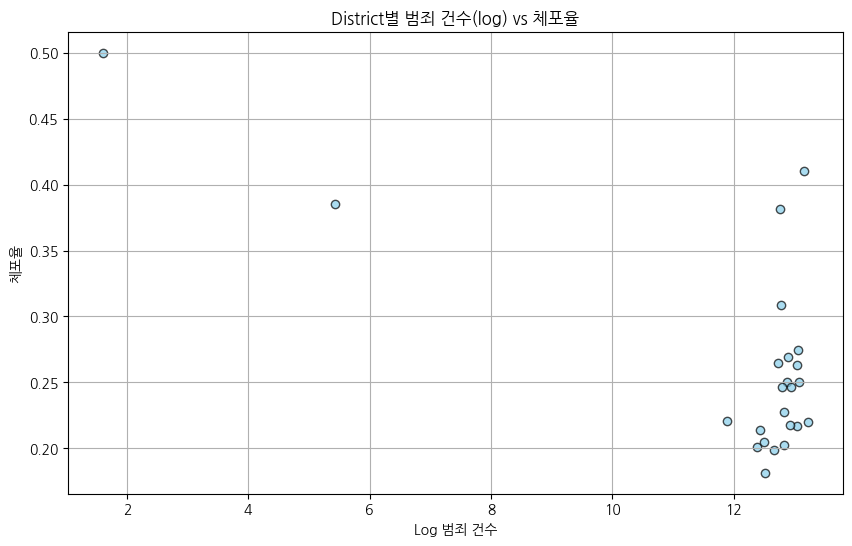

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(df['log_count'], df['Arrest Rate'], alpha=0.7, color='skyblue', edgecolor='k')
plt.xlabel('Log 범죄 건수')
plt.ylabel('체포율')
plt.title('District별 범죄 건수(log) vs 체포율')
plt.grid(True)
plt.show()

범죄 건수가 많은 District 대부분은 체포율이 낮음<br>
→ 즉, 감시나 치안 효율이 낮을 가능성
→ 또는 범죄가 많아 과부하 상태일 가능성

범죄 건수가 적은 일부 District의 체포율이 높아 보이지만,<br>
→ 건수가 너무 작아서 통계적으로 신뢰도 낮음

In [18]:
# 이상치 제거 (log_count 기준으로 7 미만)
df_filtered = df[df['log_count'] > 7]

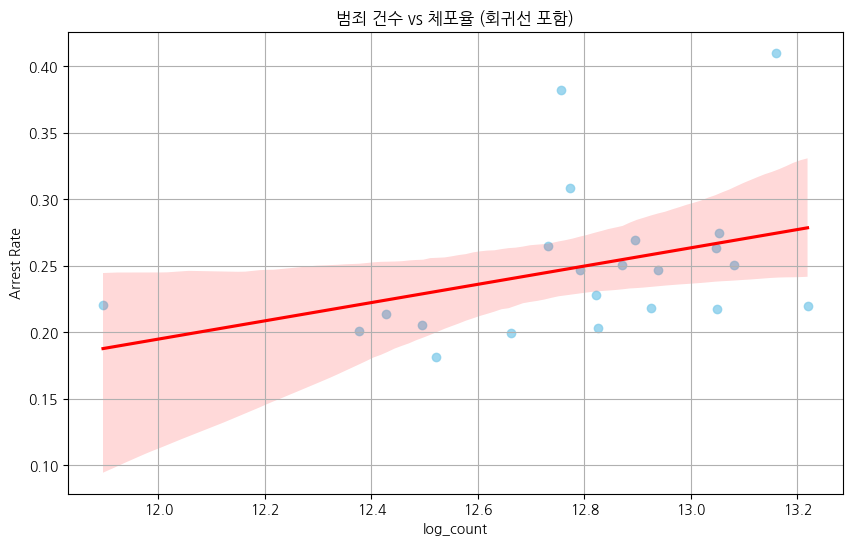

In [19]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df_filtered, x='log_count', y='Arrest Rate', scatter_kws={'color':'skyblue'}, line_kws={'color':'red'})
plt.title('범죄 건수 vs 체포율 (회귀선 포함)')
plt.grid(True)
plt.show()

-> district는 경찰행정구역을 행정편의상 쪼갠 단위로 보는 눈이 많다/적다를 판가름 하기 어려움.

### Beat : 시카고 경찰이 순찰을 도는 가장 작은 단위 구역

각 District는 여러 개의 Beat로 나뉘어 있음

    ex) District 1 → Beat 111, 112, 113, ...

하나의 Beat ≒ 한 동네 크기

#### 범죄 발생률 top 20에 속해있는 beat별로 강력범죄별 발생 건수

In [8]:
# Beat별 범죄 발생 건수
beat_crime_count = chicago['Beat'].value_counts().sort_values(ascending=False)
top_20_beats = beat_crime_count.head(20).index

In [9]:
violent_crimes = [
    "HOMICIDE", "CRIMINAL SEXUAL ASSAULT", "ROBBERY", "BATTERY", "RITUALISM",
    "ASSAULT", "BURGLARY", "THEFT", "MOTOR VEHICLE THEFT", "HUMAN TRAFFICKING", "ARSON"
]

In [10]:
# 강력범죄 + 상위 20 Beat 필터링
violent_df = chicago[(chicago['Primary Type'].isin(violent_crimes)) & (chicago['Beat'].isin(top_20_beats))]

In [11]:
# 그룹화하여 발생 건수 계산
beat_violent_count = violent_df.groupby(['Beat', 'Primary Type'])['ID'].count().reset_index()


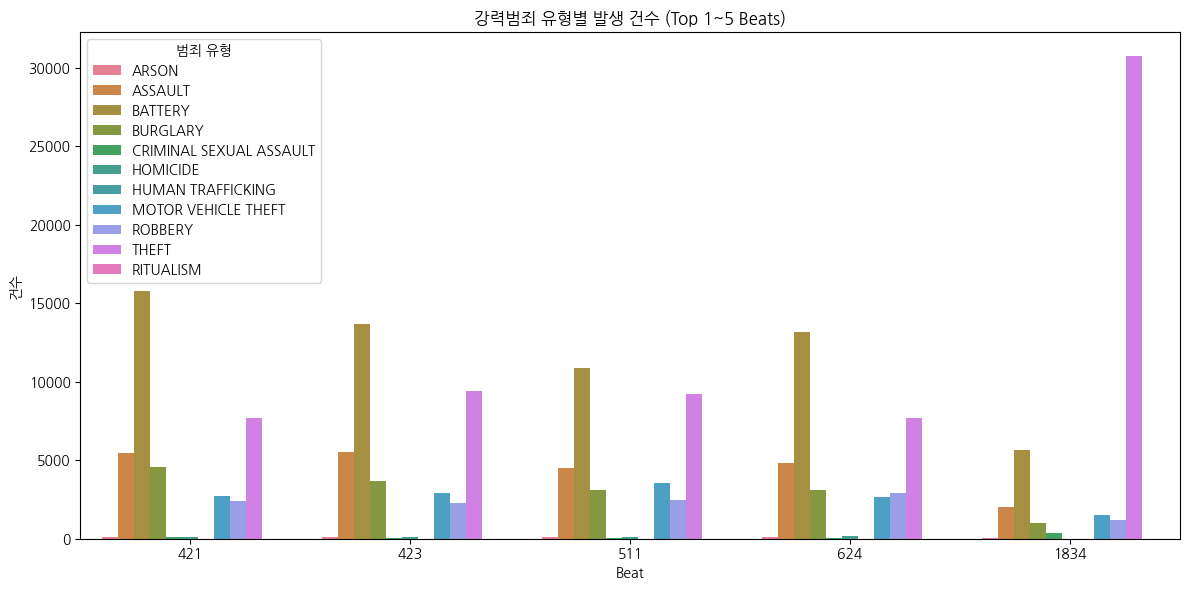

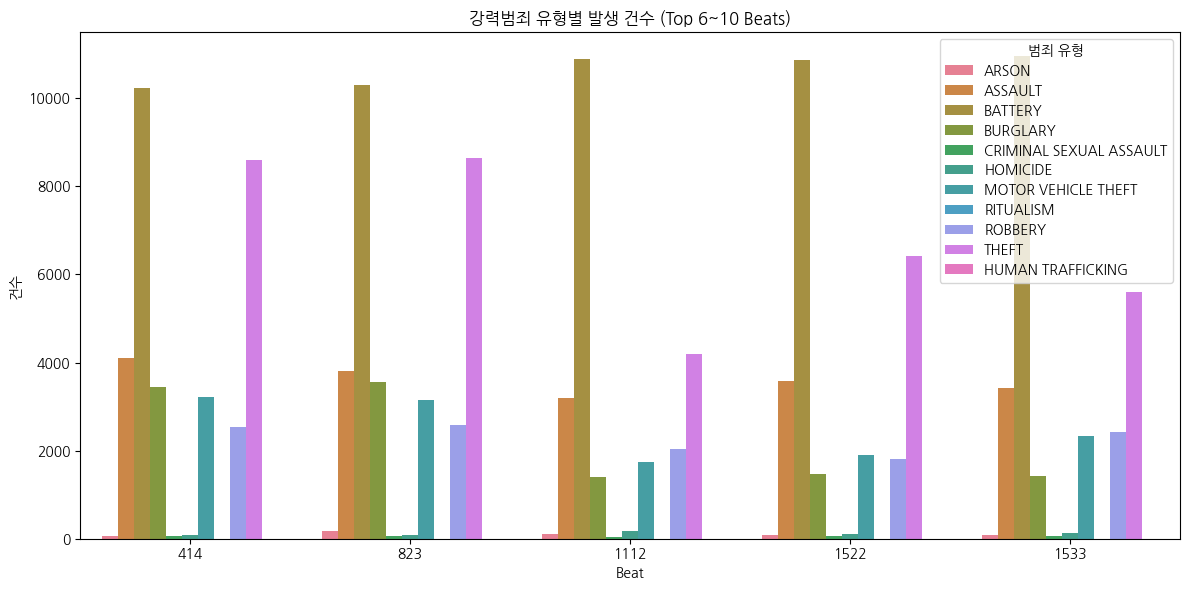

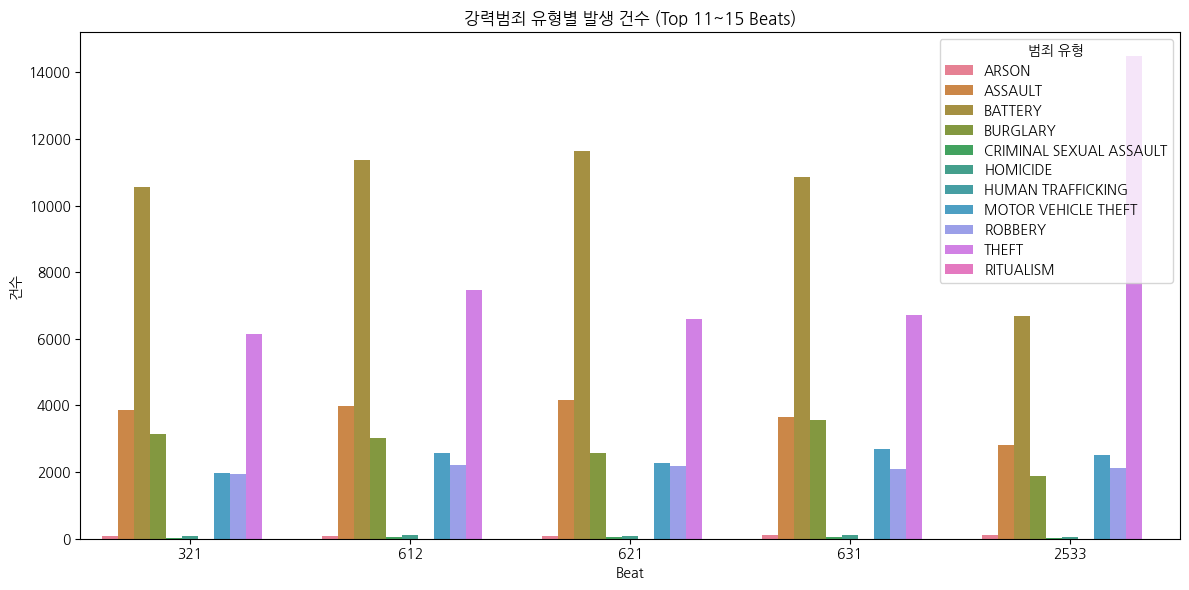

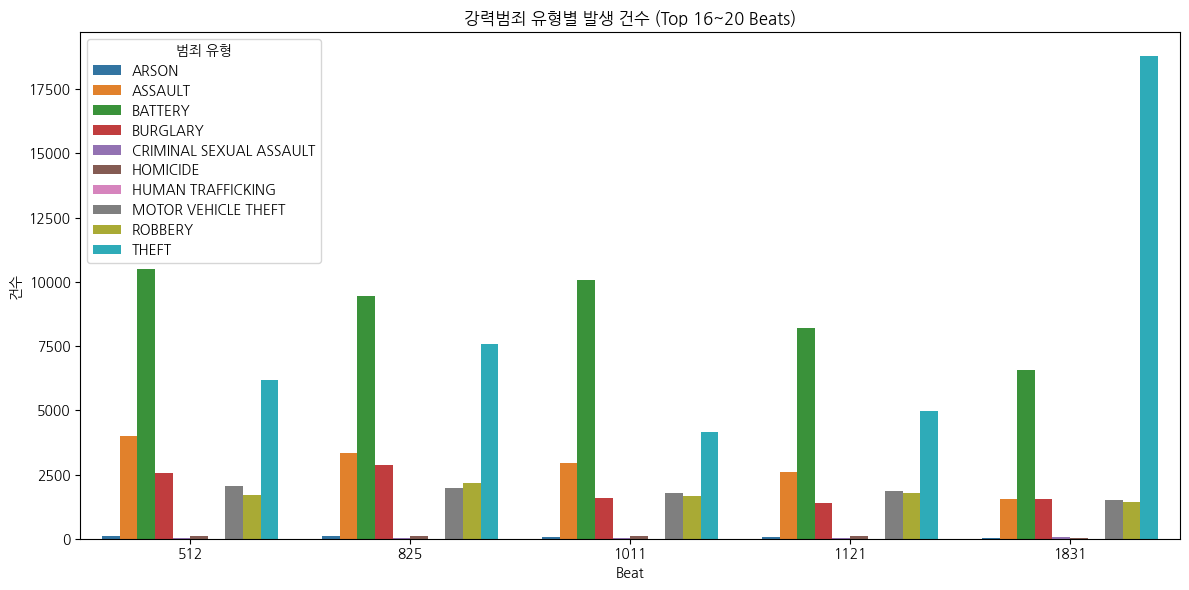

In [13]:
chunks = [top_20_beats[i:i+5] for i in range(0, len(top_20_beats), 5)]

for i, beats in enumerate(chunks):
    plt.figure(figsize=(12, 6))
    chunk_data = beat_violent_count[beat_violent_count['Beat'].isin(beats)]
    sns.barplot(data=chunk_data, x='Beat', y='ID', hue='Primary Type')
    plt.title(f'강력범죄 유형별 발생 건수 (Top {i*5+1}~{i*5+5} Beats)')
    plt.xlabel('Beat')
    plt.ylabel('건수')
    plt.legend(title='범죄 유형')
    plt.tight_layout()
    plt.show()

In [14]:
# 1. 야간 시간대에 발생한 범죄만 추출 (0~5시, 23시)
night_hours = chicago[chicago['Hour'].between(0, 5) | (chicago['Hour'] == 23)]

# 2. Beat별 야간 범죄 건수 집계
beat_night_count = night_hours.groupby('Beat')['ID'].count()

# 3. Beat별 전체 범죄 건수
beat_total = chicago.groupby('Beat')['ID'].count()

# 4. 야간 범죄 비율 계산 (야간 / 전체)
beat_night_ratio = (beat_night_count / beat_total).fillna(0)

In [15]:
beat_night_ratio.sort_values(ascending=False).head(10)

,ID
Beat,
1924,0.383827
1831,0.383745
2331,0.382652
1824,0.353053
1832,0.297503
2324,0.293618
1925,0.291792
1323,0.281656
1431,0.279489


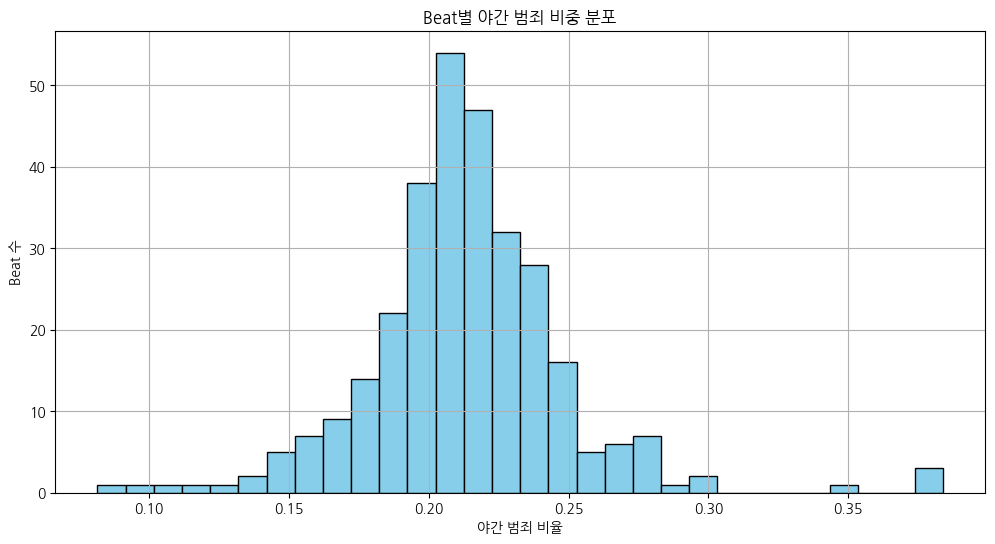

In [16]:
# 전체 분포 보기
plt.figure(figsize=(12, 6))
beat_night_ratio.hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Beat별 야간 범죄 비중 분포')
plt.xlabel('야간 범죄 비율')
plt.ylabel('Beat 수')
plt.grid(True)
plt.show()

► 전체 Beat 중 다수가 야간 범죄 비율 18~22% 정도에 몰려 있음

그 외에도 야간 비율이 30% 이상인 이상치 Beat도 존재함 : 사람이 적을 때 범죄가 더 많이 발생